This is an exercise to explore attrbiutes in the Iowa house price data set and dig up some "fun facts" about the sales price and the relationships between other variables and the price. This notebook will focus on the following aspects:
* Overall evaluation of data quality and handle missing data
* Explore relationships between sales price and other attributes
* Feature selection/engineering from all the available attributes

## 0. Setup

In [23]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 2000)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1.Get basic dataset info and handle missing values

In [24]:
houseRaw = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
houseSub = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
house = houseRaw.copy()

In [25]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [26]:
house.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


Let's take a look at attributes with missing values and decide what to do with them. A few things I would consider when making those decisions:
1. Is it legitimate to have missing values? For example if the house doesn't have a pool, then it is fine to have PoolQC as NULL. If it is OK to have missing values, and if there is not an indicator in the dataset, maybe it's a good idea to add one
2. Is it related to other variables that are not missing? If so just keep the one without missing value and drop the one with it
3. What's the impact of missing data on the analysis? This can be assessed by looking at
    * What's the percentage of missing records compared to the total # of records? If it's small enough, just delete the records with missing values
    * How likely the attribute will affect the target variable? If it is a useless attribute anyway, let's just exclude it
4. How to backfill the important missing values? 
    * Do we want to fill them with some statistics (average, median, most frequent)?
    * Do we want to infer them using some rules or even more advanced modeling techniques? (usually rules are good enough)

In [27]:
totalMissing = house.isnull().sum().sort_values(ascending = False)
percMissing = house.isnull().sum() / house.isnull().count().sort_values(ascending = False)
missing = pd.concat([totalMissing, percMissing], axis = 1, keys = ['total #', '%'])
missing[missing['total #'] > 0]

,total #,%
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


From the results above, here are my initial thoughts:
1. Most attributes with missing values are categorical attrbiutes, and it is legitimate for some houses to not to have a pool/basement/garage/perk/alley access/fence so I'm going to fill those missing categories with "No Feature" (but drop GarageYrBlt since there is no point in filling the year)
2. For 'Electrical', just delete the missing record - not worth the effort to deal with it
3. For 'LotFrontage' and 'MasVnrArea, I'll check the scatterplot and decide if there is a relationship with sales price

The correlation matrix between LotFrontage and SalePrice is              LotFrontage  SalePrice
LotFrontage     1.000000   0.351799
SalePrice       0.351799   1.000000


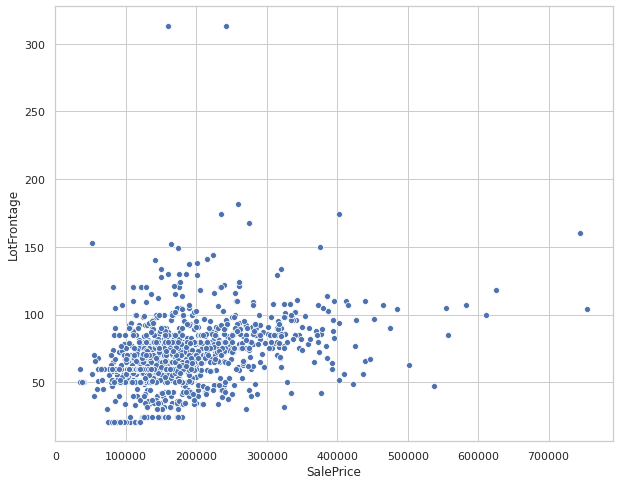

In [28]:
# LotFrontage
print('The correlation matrix between {c} and SalePrice is {n}'.format(c = 'LotFrontage', n = house[['LotFrontage', 'SalePrice']].corr()))
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'SalePrice', y = 'LotFrontage', data = house)

The correlation matrix between MasVnrArea and SalePrice is             MasVnrArea  SalePrice
MasVnrArea    1.000000   0.477493
SalePrice     0.477493   1.000000


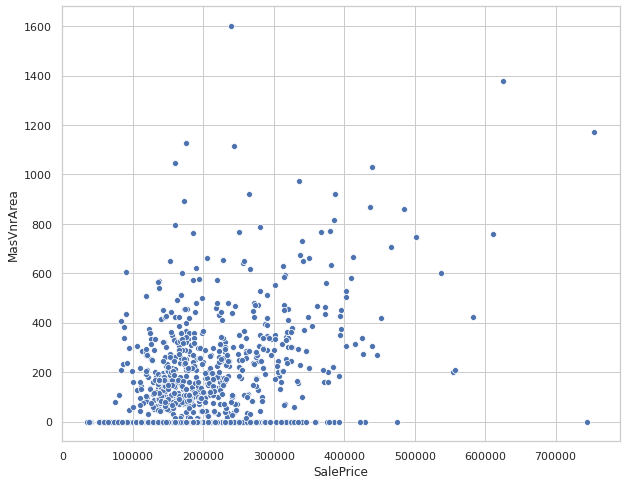

In [29]:
# MasVnrArea
print('The correlation matrix between {c} and SalePrice is {n}'.format(c = 'MasVnrArea', n = house[['MasVnrArea', 'SalePrice']].corr()))
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'SalePrice', y = 'MasVnrArea', data = house)

From the plots and correlation matrix, these two variables have some relationships with sales price, and it's hard to decide if they should be included or excldued at this point. I'll fill the missing values with medians of the column (not to disrupt the distributions) and decide on what to keep when doing grid search in model training

In [30]:
# final data set
house = house.drop(columns = 'GarageYrBlt')
house = house.drop(house.loc[house['Electrical'].isnull()].index)
house['LotFrontage'].fillna(house['LotFrontage'].median(), inplace = True)
house['MasVnrArea'].fillna(house['MasVnrArea'].median(), inplace = True)
colums_to_fill = missing.drop(['GarageYrBlt', 'Electrical'], axis = 0)[missing['total #'] > 0].index
for i in range(len(colums_to_fill)):
    house.loc[house[colums_to_fill[i]].isnull(), colums_to_fill[i]] = 'No Feature'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [31]:
house['LotFrontage'] = house['LotFrontage'].astype('float')
house['MasVnrArea'] = house['MasVnrArea'].astype('float')

In [32]:
house.isnull().sum().sum()

0

## 2. Explore relationships between SalePrice and other attributes

In [33]:
# Look through the data attributes and dictionary and classify data into categorical and numeric types
IdCol = ['Id']
label = ['SalePrice']
num = [
    'LotArea', 'LotFrontage', 'MasVnrArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
    'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'OverallQual', 'OverallCond'
]
cat = house.drop(columns = num + IdCol + label, axis = 1).columns
house[cat] = house[cat].astype('category')

Next let's explore the relationships between numeric attributes to SalePrice

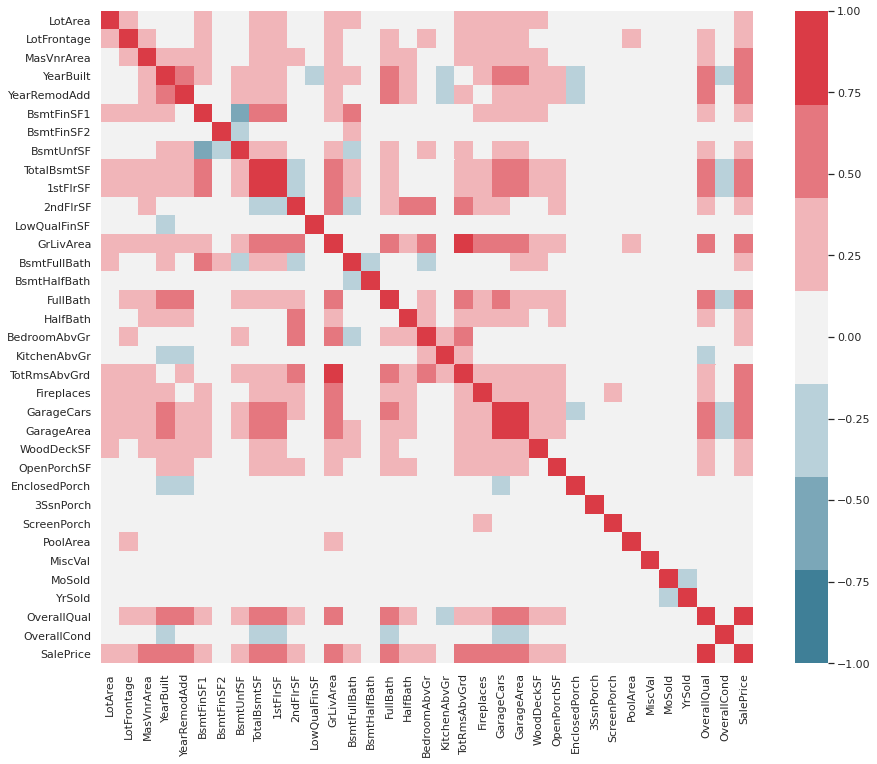

In [34]:
corr_matrix = house.drop(columns = ['Id'])[num + label].corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr_matrix, vmin = -1, vmax = 1, square = True, cmap = sns.diverging_palette(225, 10, n = 7))

Top attributes related to sales price: OverallQual, MasVnrArea, YearBuilt/YearRemodAdd, TotalBsmtSF/1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea. I noticed that YearBuilt is also strongly related to sales price, so it makes sense to plot the time series and observe patterns.

In [35]:
house['DaySold'] = 1
ddtt = house[['YrSold', 'MoSold', 'DaySold']].rename(columns = {'YrSold': 'year', 'MoSold': 'month', 'DaySold': 'day'})
house['year_month'] = pd.to_datetime(ddtt)

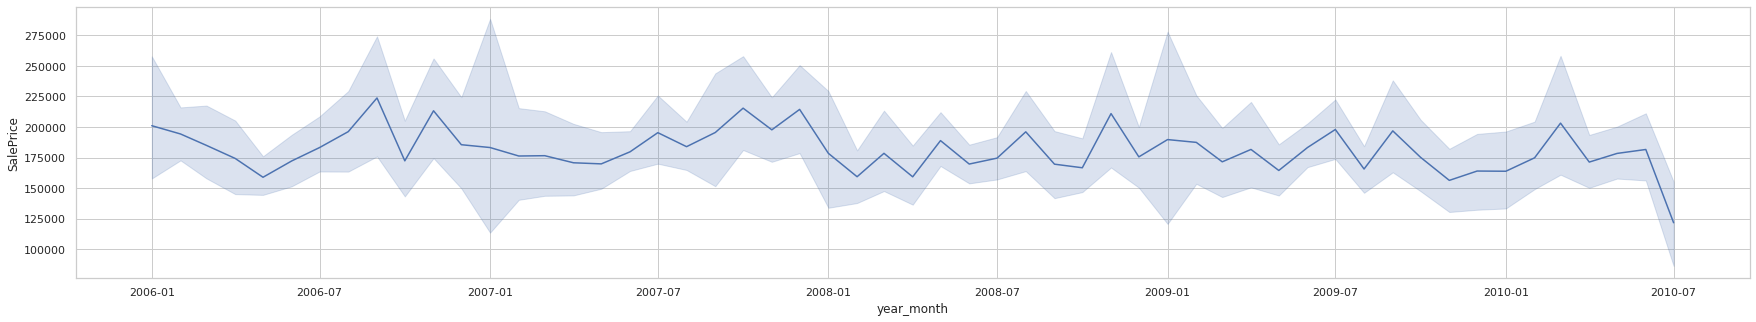

In [36]:
plt.figure(figsize = (30, 5))
sns.lineplot(x = 'year_month', y = 'SalePrice', data = house)

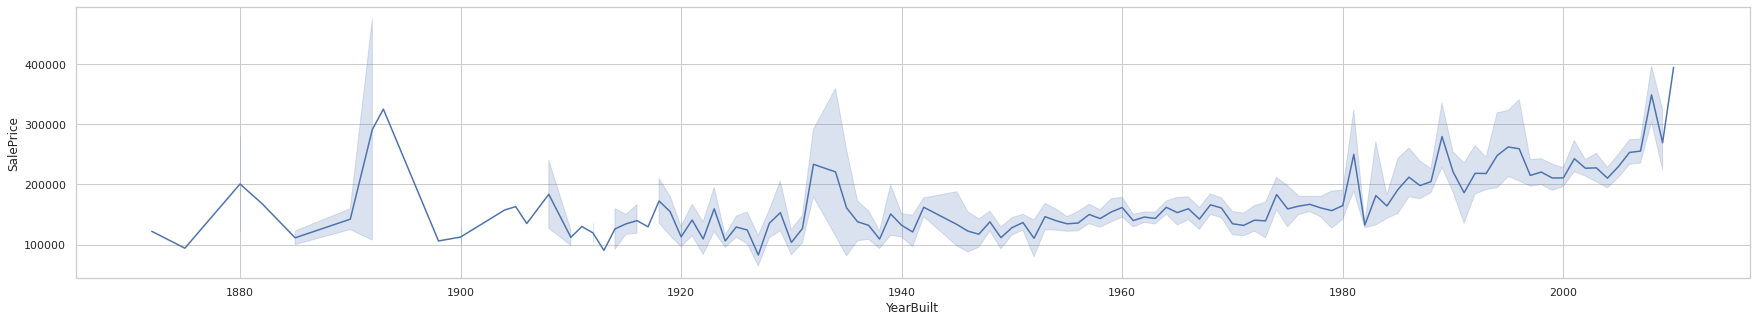

In [37]:
plt.figure(figsize = (30, 5))
sns.lineplot(x = 'YearBuilt', y = 'SalePrice', data = house)

There is not an obvious trend when looking at sold year-month, but there are price spikes for houses built before 1900 and around 1930. It's a bit counterintuitive that older houses have the same price as newly built houses, and there may be something else that dominated the price but manifested through YearBuilt. What about correlations between top numeric features?

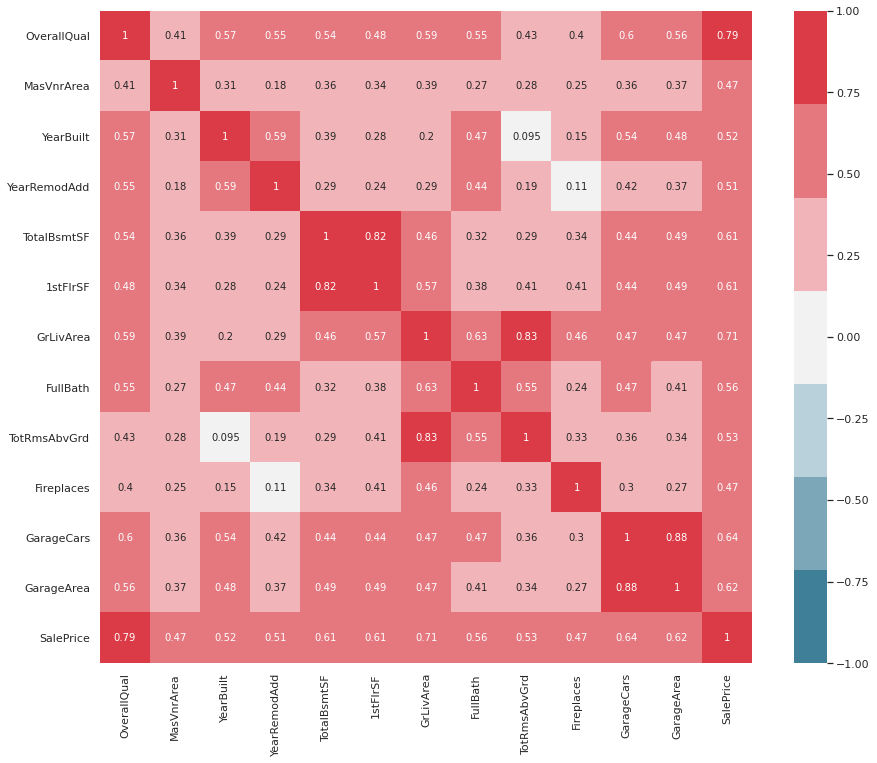

In [38]:
corr_matrix_top = house[['OverallQual', 'MasVnrArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'SalePrice']].corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr_matrix_top, vmin = -1, vmax = 1, square = True, annot = True, cmap = sns.diverging_palette(225, 10, n = 7))

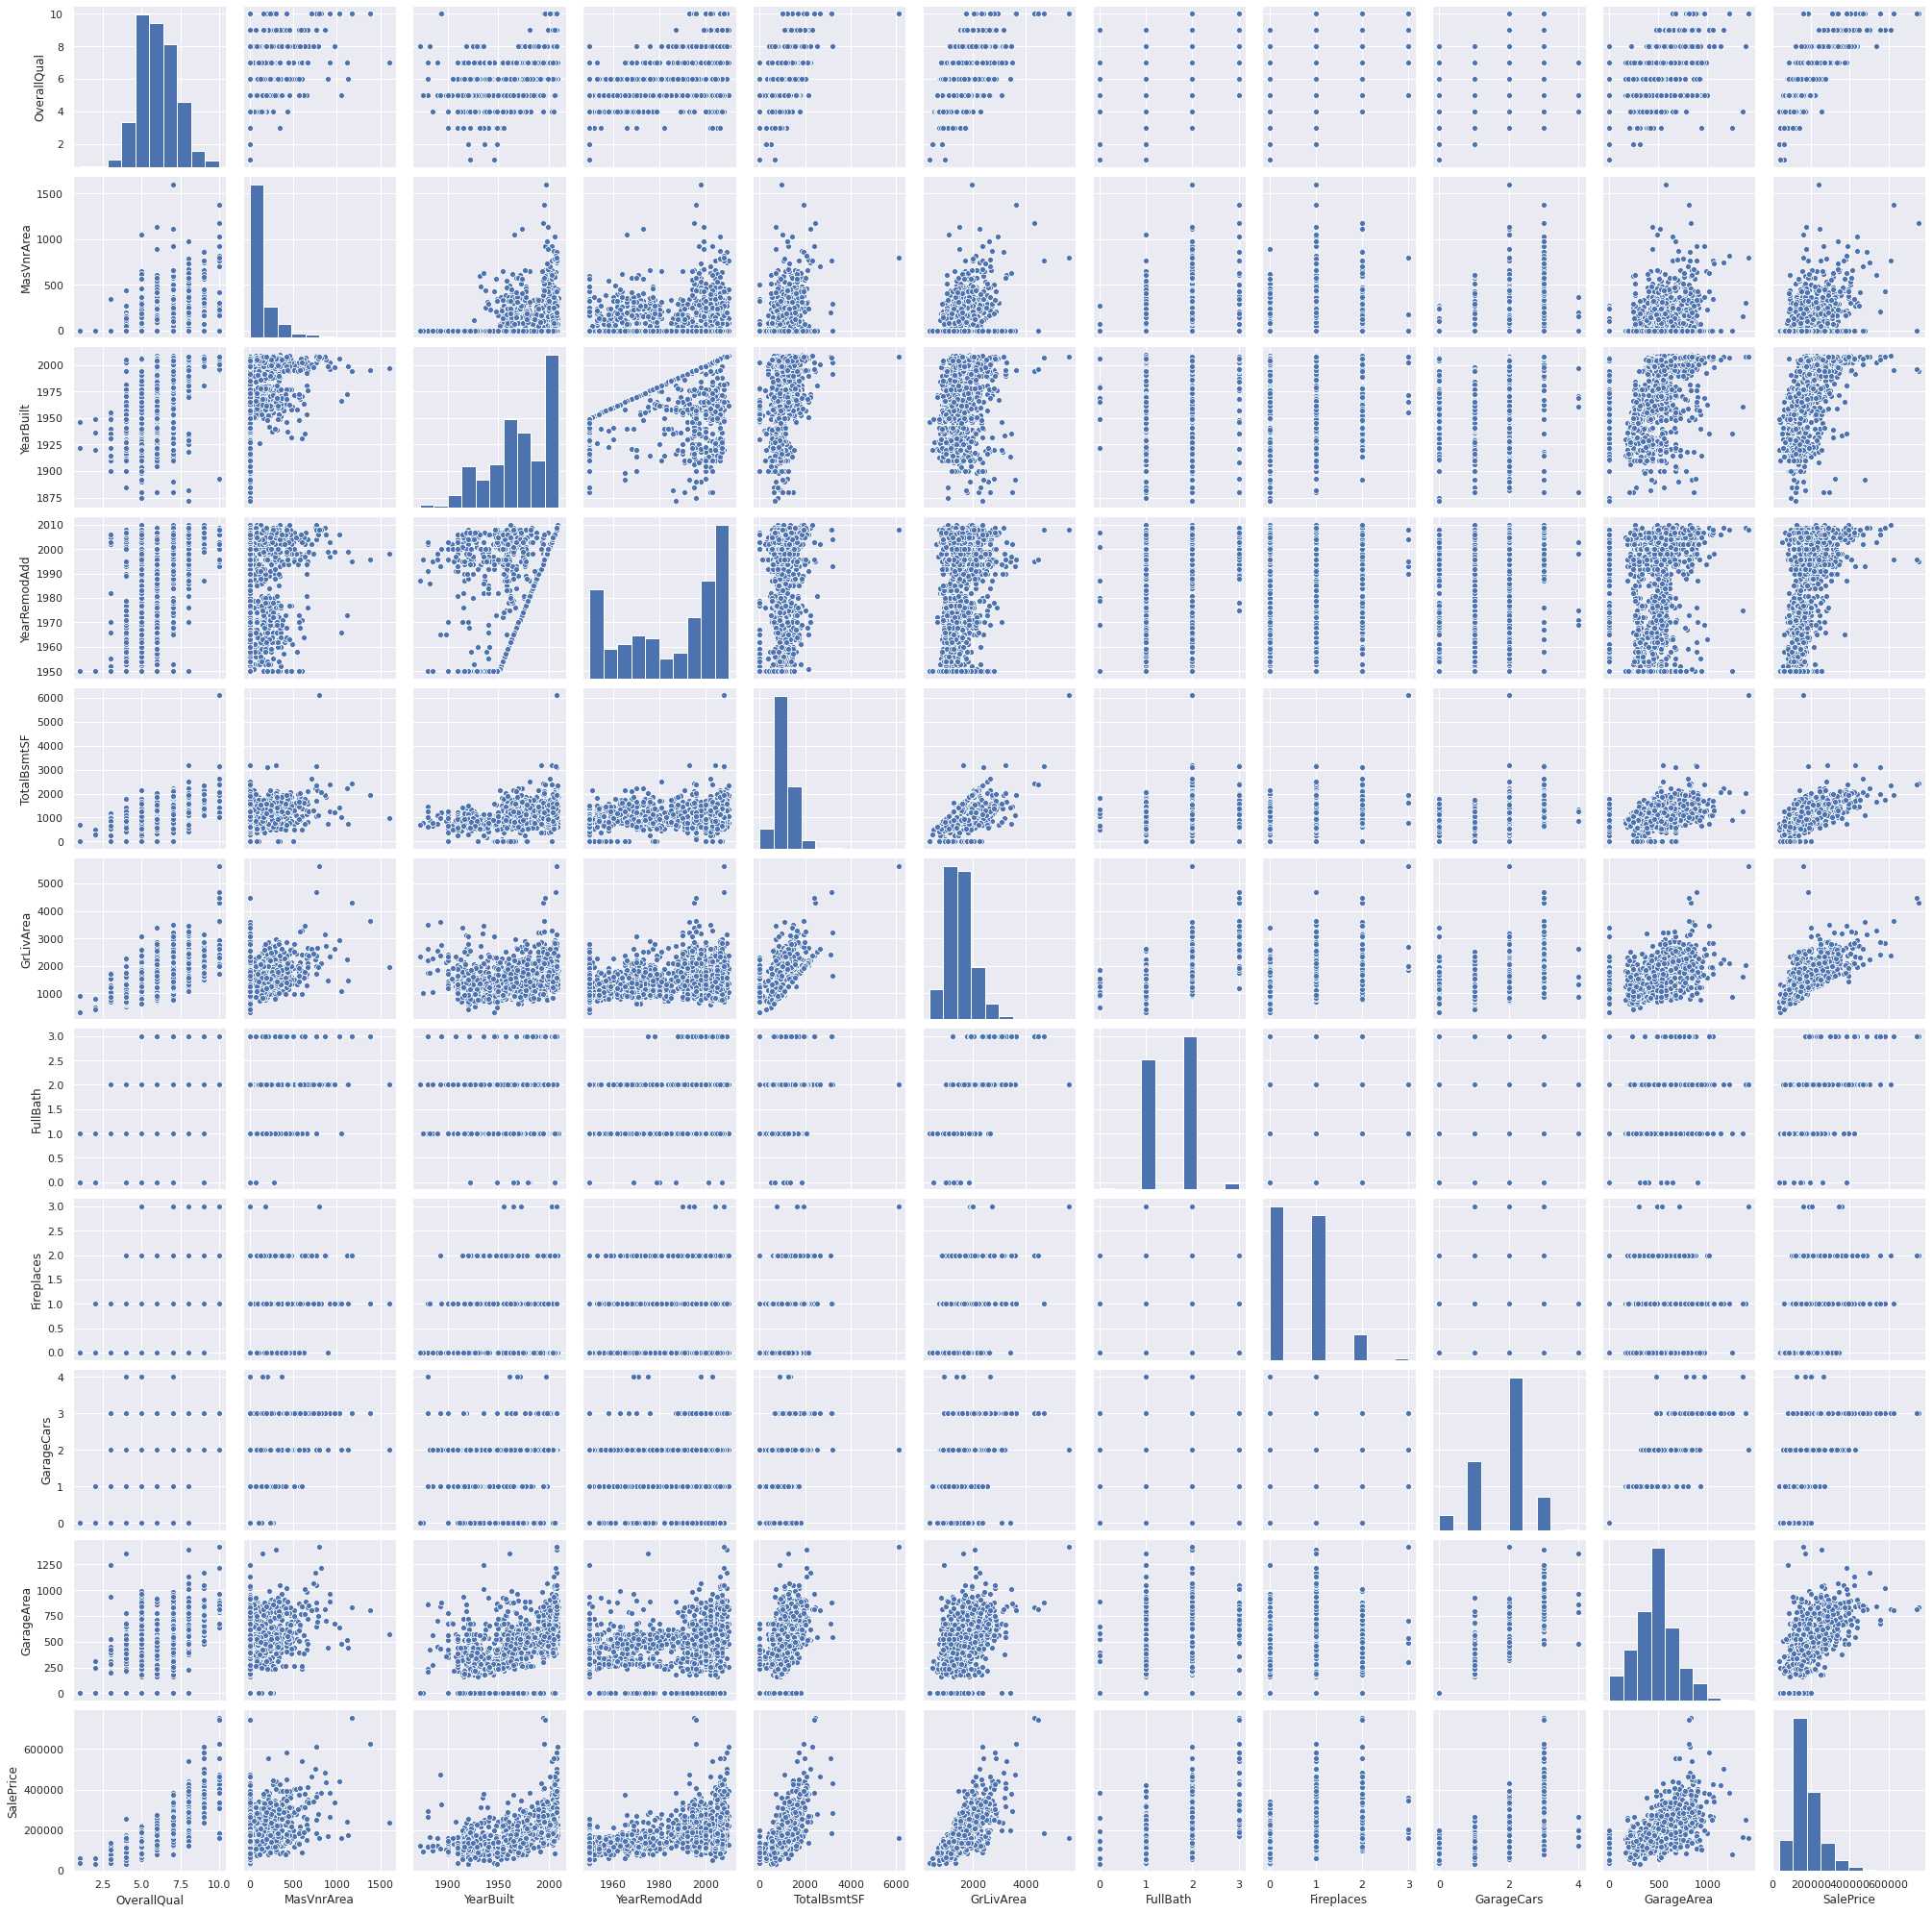

In [39]:
sns.set()
sns.pairplot(house[['OverallQual', 'MasVnrArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageCars', 'GarageArea', 'SalePrice']], height = 2.5)
plt.show()

Some top numeric features have correlations among themselves. This may cause collinearity if we use all of them, so I'll pick TotalBsmtSF, GrLivArea and GarageArea and drop 1stFlrSF, TotRmsAbvGrd and GarageCars.

For categorical variables, there is not a lot of options to examine the correlation between sales price and them. Also it's probably easier to do feature selection while training/tuning the model. For now let's create some visualization and have an intuition about data.

In [40]:
cat

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

Differences in housing style and zones have impacts on price ranges 
<br>
For example, newer dwelings are more expensive than older dwellings of the same age, and low density residences have higher median price than medium to high density residences

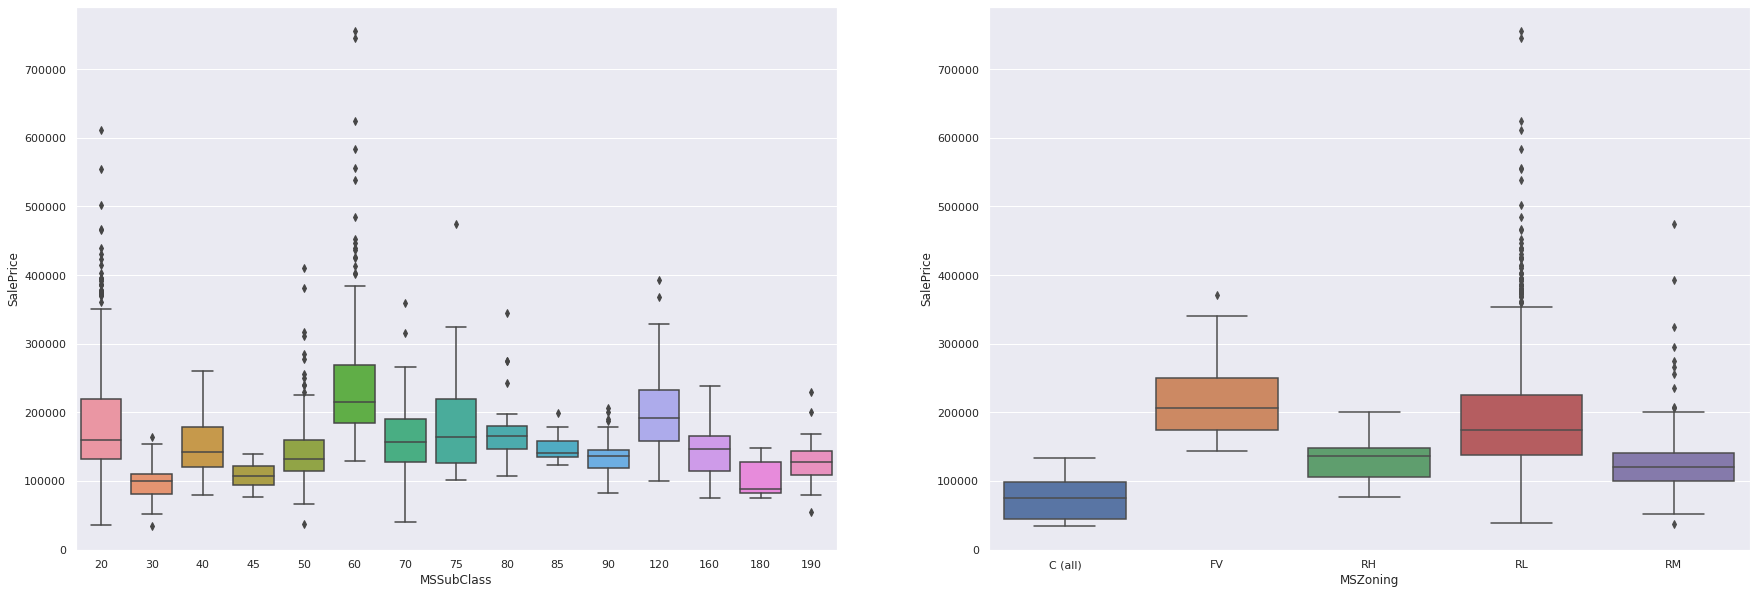

In [41]:
f, axes = plt.subplots(1, 2, figsize = (30, 10))
sns.set_style('whitegrid')
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = house, ax = axes[0])
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = house, ax = axes[1])

Neighborhoods also have impact on prices. That makes sense because housing price is all about locaiton, location and location!

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

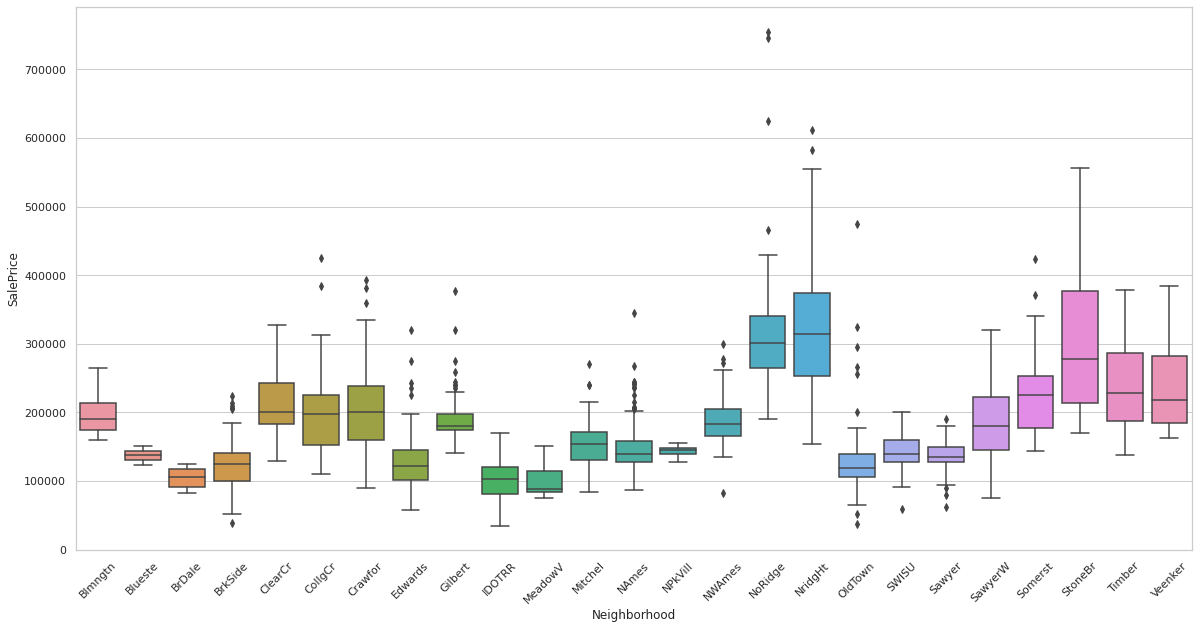

In [42]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = house)
plt.xticks(rotation = 45)

How about perks? I'd be willing to pay a little more rent if there are gyms or pools in the building. Same pattern observed in this data set, especially those with a second perk.

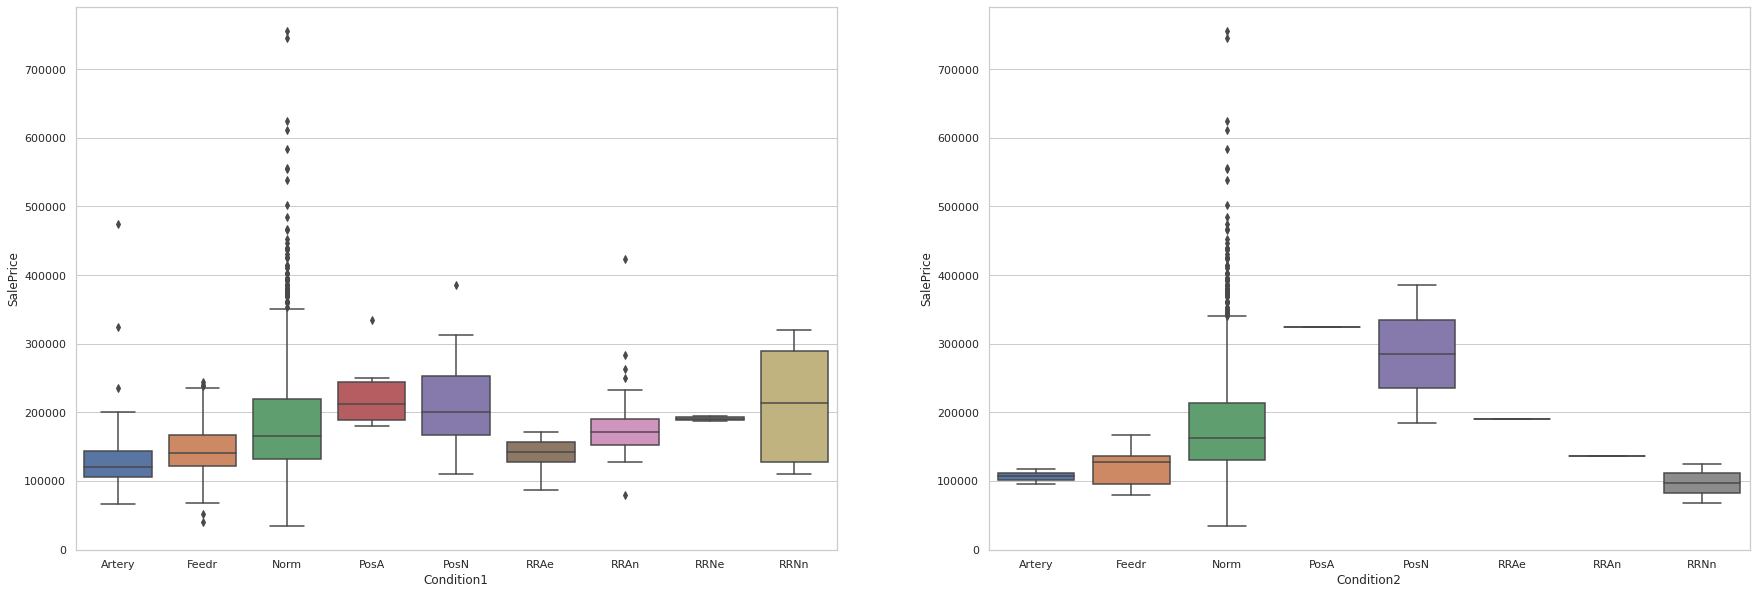

In [43]:
f, axes = plt.subplots(1, 2, figsize = (30, 10))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = house, ax = axes[0])
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = house, ax = axes[1])

How about quality? It certainly affects prices since nobody wants to spend a lot on a broken home and even more to fix it. Looks like there are price gaps between excellent/good conditions and other conditions, but nothing too much if falling under excellent/good.

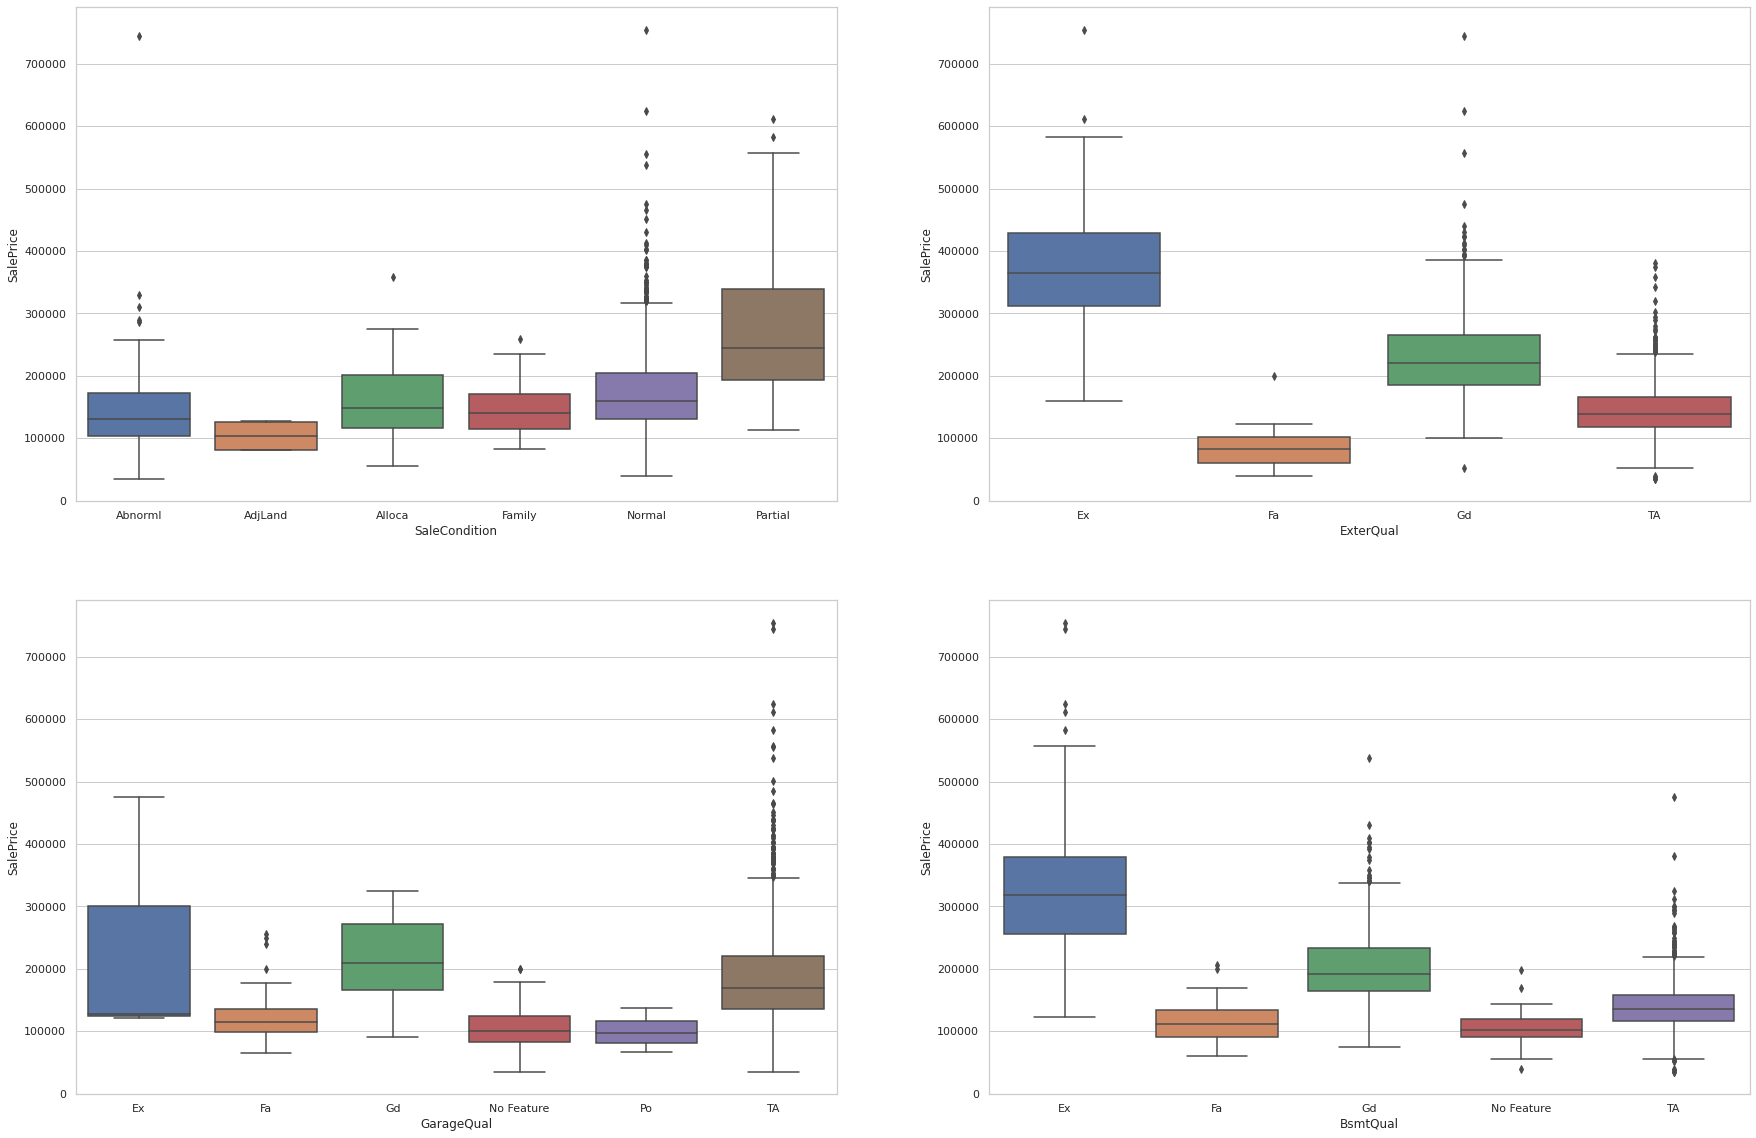

In [44]:
f, axes = plt.subplots(2, 2, figsize = (30, 20))
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = house, ax = axes[0, 0])
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = house, ax = axes[0, 1])
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = house, ax = axes[1, 0])
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = house, ax = axes[1, 1])

There are way more charts I can draw here, but it would be good to build a data pipeline and decide if a certain feature should be included depending on model performances. In the next notebook I'm going to build a data pipeline to transform the train and test data sets, batch fit baseline models and tune the selected model both for hyperparameters and feature selection. Stay tuned!